**О наборе данных**

Этот набор данных предоставляет детальный обзор тренировочных привычек посетителей тренажерного зала, их физических характеристик и показателей фитнеса. Он содержит 973 записи данных из тренажерного зала, включая ключевые показатели эффективности, такие как частота пульса, сожженные калории и продолжительность тренировки. Каждая запись также включает демографические данные и уровень опыта, что позволяет проводить комплексный анализ фитнес-паттернов, прогресса атлетов и тенденций в состоянии здоровья.

**Ключевые характеристики:**

*   **Возраст (Age):** Возраст посетителя тренажерного зала.
*   **Пол (Gender):** Пол посетителя (Мужчина или Женщина).
*   **Вес (кг) (Weight (kg)):** Вес посетителя в килограммах.
*   **Рост (м) (Height (m)):** Рост посетителя в метрах.
*   **Макс. пульс (Max_BPM):** Максимальная частота пульса (ударов в минуту) во время тренировок.
*   **Ср. пульс (Avg_BPM):** Средняя частота пульса во время тренировок.
*   **Пульс в покое (Resting_BPM):** Частота пульса в состоянии покоя до тренировки.
*   **Продолжительность тренировки (часы) (Session_Duration (hours)):** Длительность каждой тренировки в часах.
*   **Сожженные калории (Calories_Burned):** Общее количество калорий, сожженных за тренировку.
*   **Тип тренировки (Workout_Type):** Тип выполненной тренировки (например, Кардио, Силовая, Йога, ВИИТ).
*   **Процент жира (Fat_Percentage):** Процентное содержание жира в организме посетителя.
*   **Потребление воды (литры) (Water_Intake (liters)):** Ежедневное потребление воды в дни тренировок.
*   **Частота тренировок (дни/неделю) (Workout_Frequency (days/week)):** Количество тренировок в неделю.
*   **Уровень опыта (Experience_Level):** Уровень опыта, от начинающего (1) до эксперта (3).
*   **ИМТ (BMI):** Индекс массы тела, рассчитанный на основе роста и веса.

Этот набор данных идеально подходит для специалистов по анализу данных, исследователей в области здоровья и фитнес-энтузиастов, заинтересованных в изучении привычек тренировок, моделировании фитнес-прогресса или анализе взаимосвязи между демографическими и физиологическими данными. Благодаря широкому спектру переменных, он позволяет получить представление о том, как различные факторы влияют на интенсивность тренировок, выносливость и общее состояние здоровья.

In [3]:
!pip install seaborn --break-system-packages

Defaulting to user installation because normal site-packages is not writeable


Начинаем анализ данных тренажерного зала...
Загрузка данных...
Данные загружены успешно!
Размер датасета: 973 строк, 15 столбцов

Первые 5 строк:
   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0

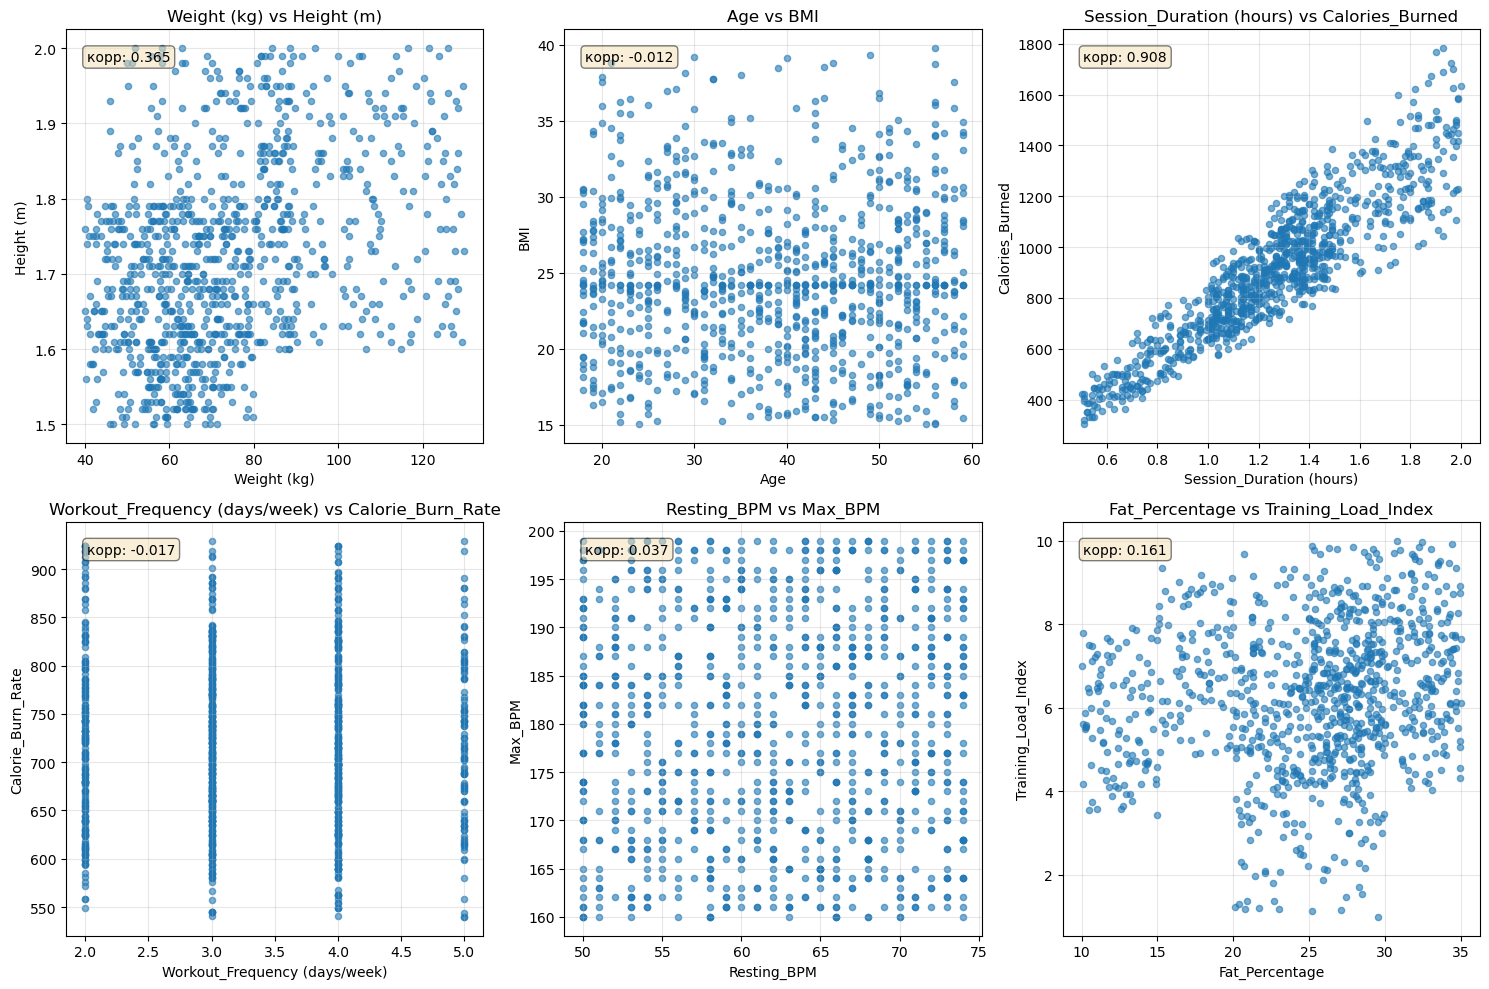


4.2 Анализ кластеров на примере 'Вес vs Рост'...


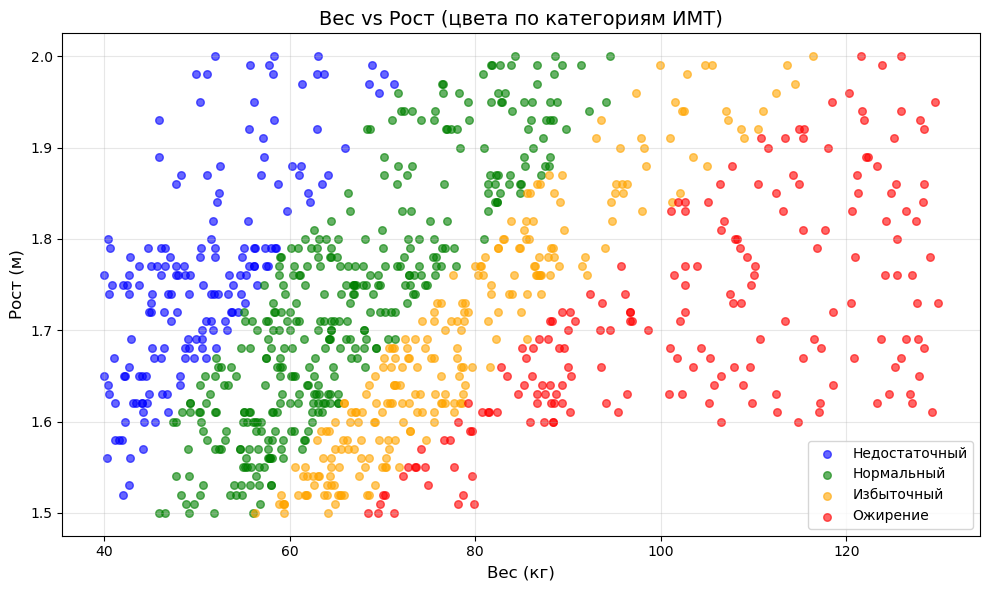


Распределение по категориям ИМТ:
  Недостаточный: 168 человек (17.3%)
  Нормальный: 370 человек (38.0%)
  Избыточный: 243 человек (25.0%)
  Ожирение: 192 человек (19.7%)

4.3 Анализ возрастных групп...


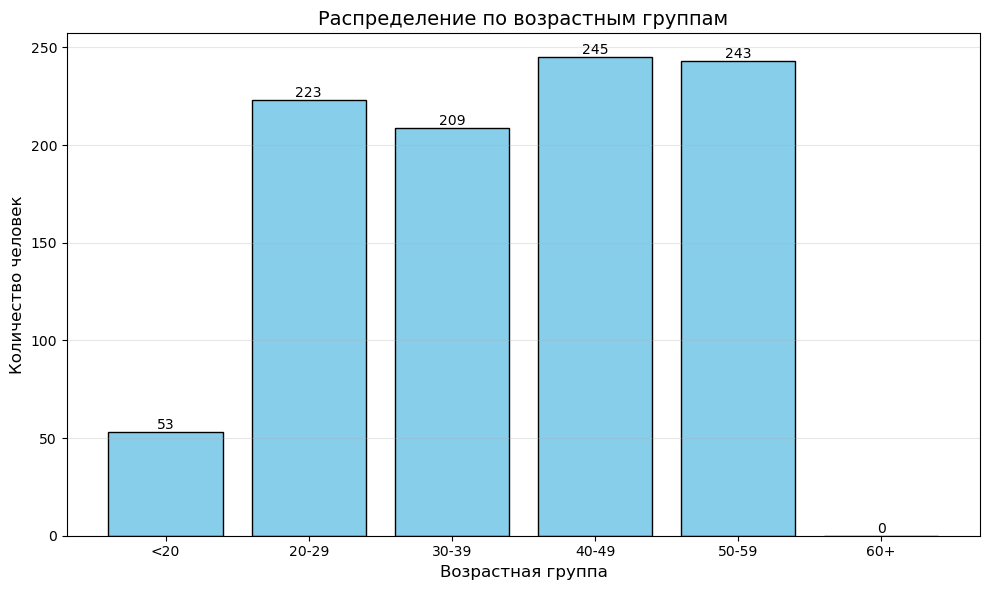


Средняя скорость сжигания калорий по возрастным группам:
                 mean        std  count
Age_Group                              
<20        753.607119  94.517381     53
20-29      753.144208  84.910119    223
30-39      749.053070  82.882283    209
40-49      699.468369  79.461012    245
50-59      679.653144  74.183777    243
60+               NaN        NaN      0

5. ИТОГОВЫЙ ОТЧЕТ

Общая информация:
  Всего записей: 973
  Всего столбцов: 19
  Числовые столбцы: 16
  Текстовые столбцы: ['Gender', 'Workout_Type']
    Gender: 2 уникальных значений
      Значения: Male, Female
    Workout_Type: 4 уникальных значений
      Значения: Yoga, HIIT, Cardio, Strength

Ключевые выводы:
1. Данные успешно очищены и обогащены новыми атрибутами
2. Построены визуализации для анализа взаимосвязей
3. Выявлены кластеры и группы в данных
4. Очищенные данные сохранены в файл 'cleaned_gym_data.csv'

6. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ
Расчет корреляционной матрицы...

Сильные корреляции (|r| > 0.7):
  Weigh

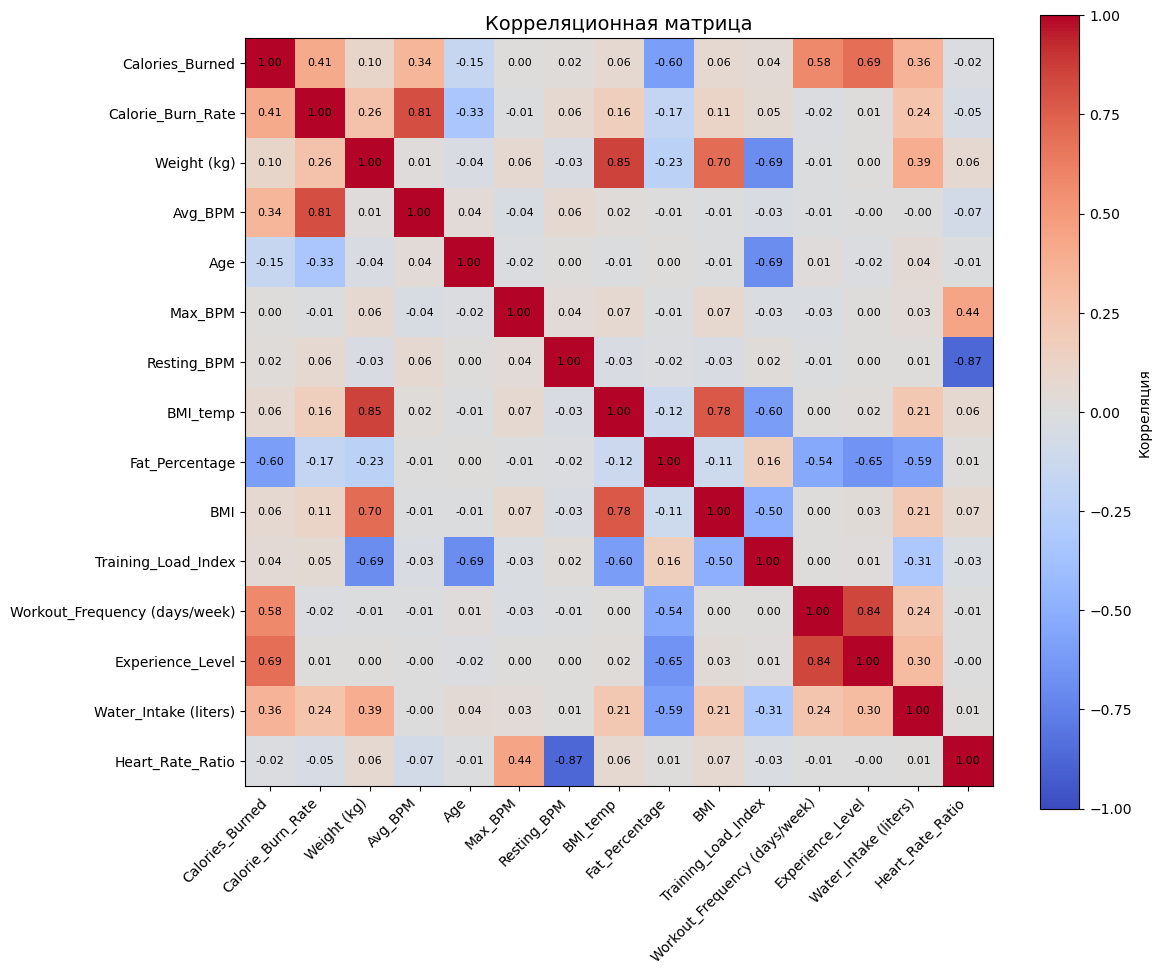


Анализ завершен успешно!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import warnings
warnings.filterwarnings('ignore')

# Сначала просто прочитаем данные и посмотрим структуру
def load_data_safely(filename):
    """Безопасная загрузка данных"""
    print("Загрузка данных...")
    
    # Используем pandas для более надежной загрузки
    try:
        df = pd.read_csv(filename, encoding='utf-8')
        print(f"Данные загружены успешно!")
        print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
        print(f"\nПервые 5 строк:")
        print(df.head())
        print(f"\nИнформация о данных:")
        print(df.info())
        print(f"\nОсновные статистики:")
        print(df.describe())
        
        return df
    except Exception as e:
        print(f"Ошибка при загрузке: {e}")
        return None

# Основная функция
def main_simple():
    filename = 'gym_members_exercise_tracking.csv'
    
    # 1. Загрузка данных
    df = load_data_safely(filename)
    
    if df is None:
        print("Не удалось загрузить данные. Проверьте путь к файлу.")
        return
    
    print("\n" + "="*80)
    print("1. ДОБАВЛЕНИЕ НОВЫХ АТРИБУТОВ")
    print("="*80)
    
    # Проверяем наличие необходимых столбцов
    print("Доступные столбцы:", list(df.columns))
    
    # Добавляем новые атрибуты
    # 1. Индекс тренировочной нагрузки
    if 'Age' in df.columns and 'Weight (kg)' in df.columns:
        print("\n1. Добавляем 'Training_Load_Index'...")
        # Простая формула
        df['Training_Load_Index'] = (df['Age'].max() - df['Age']) / df['Age'].std() + \
                                   (df['Weight (kg)'].max() - df['Weight (kg)']) / df['Weight (kg)'].std()
        # Нормализуем от 1 до 10
        df['Training_Load_Index'] = 1 + 9 * (df['Training_Load_Index'] - df['Training_Load_Index'].min()) / \
                                   (df['Training_Load_Index'].max() - df['Training_Load_Index'].min())
    
    # 2. Скорость сжигания калорий
    if 'Calories_Burned' in df.columns and 'Session_Duration (hours)' in df.columns:
        print("2. Добавляем 'Calorie_Burn_Rate'...")
        df['Calorie_Burn_Rate'] = df['Calories_Burned'] / df['Session_Duration (hours)']
    
    # 3. Соотношение пульса
    if 'Max_BPM' in df.columns and 'Resting_BPM' in df.columns:
        print("3. Добавляем 'Heart_Rate_Ratio'...")
        df['Heart_Rate_Ratio'] = (df['Max_BPM'] - df['Resting_BPM']) / df['Resting_BPM']
    
    print("\nНовые столбцы добавлены!")
    print("Обновленные столбцы:", list(df.columns))
    
    print("\n" + "="*80)
    print("2. ОЧИСТКА ДАННЫХ")
    print("="*80)
    
    original_shape = df.shape
    print(f"Исходный размер: {original_shape}")
    
    # 2.1 Удаление дубликатов
    print("\n2.1 Удаление дубликатов...")
    duplicates = df.duplicated().sum()
    print(f"Найдено дубликатов: {duplicates}")
    if duplicates > 0:
        df = df.drop_duplicates()
        print(f"Удалено {duplicates} дубликатов")
    
    # 2.2 Обработка пропущенных значений
    print("\n2.2 Обработка пропущенных значений...")
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print("Пропущенные значения:")
        for col in missing[missing > 0].index:
            print(f"  {col}: {missing[col]} пропусков")
            # Заполняем медианой для числовых столбцов
            if df[col].dtype in ['int64', 'float64']:
                median_val = df[col].median()
                df[col] = df[col].fillna(median_val)
                print(f"    Заполнено медианой: {median_val:.2f}")
    else:
        print("Пропущенные значения не найдены")
    
    # 2.3 Обработка выбросов (упрощенная версия)
    print("\n2.3 Обработка выбросов...")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    # Удаляем только явные выбросы
    outliers_count = 0
    for col in numeric_cols:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 3 * IQR  # Более мягкий порог
            upper_bound = Q3 + 3 * IQR
            
            # Заменяем выбросы граничными значениями вместо удаления
            outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
            outliers_count += outliers.sum()
            
            if outliers.sum() > 0:
                df.loc[df[col] < lower_bound, col] = lower_bound
                df.loc[df[col] > upper_bound, col] = upper_bound
    
    print(f"Обработано выбросов: {outliers_count}")
    
    # 2.4 Проверка корректности данных
    print("\n2.4 Проверка корректности данных...")
    
    # Проверка ИМТ
    if 'BMI' in df.columns:
        invalid_bmi = df[(df['BMI'] < 15) | (df['BMI'] > 40)].shape[0]
        if invalid_bmi > 0:
            print(f"  Некорректные значения ИМТ: {invalid_bmi}")
            # Исправляем
            median_bmi = df['BMI'].median()
            df.loc[(df['BMI'] < 15) | (df['BMI'] > 40), 'BMI'] = median_bmi
    
    # Проверка пульса
    if 'Resting_BPM' in df.columns:
        invalid_pulse = df[(df['Resting_BPM'] < 40) | (df['Resting_BPM'] > 100)].shape[0]
        if invalid_pulse > 0:
            print(f"  Некорректные значения пульса: {invalid_pulse}")
            median_pulse = df['Resting_BPM'].median()
            df.loc[(df['Resting_BPM'] < 40) | (df['Resting_BPM'] > 100), 'Resting_BPM'] = median_pulse
    
    cleaned_shape = df.shape
    print(f"\nРезультаты очистки:")
    print(f"  Исходный размер: {original_shape}")
    print(f"  После очистки: {cleaned_shape}")
    print(f"  Удалено/изменено записей: {original_shape[0] - cleaned_shape[0]}")
    
    print("\n" + "="*80)
    print("3. БАЗОВЫЙ АНАЛИЗ ДАННЫХ")
    print("="*80)
    
    # Основные статистики после очистки
    print("\nОсновные статистики после очистки:")
    print(df.describe())
    
    # Проверка типов данных
    print("\nТипы данных:")
    print(df.dtypes)
    
    # Сохраняем очищенные данные
    df.to_csv('cleaned_gym_data.csv', index=False, encoding='utf-8')
    print("\nОчищенные данные сохранены в 'cleaned_gym_data.csv'")
    
    return df

# Функция для построения графиков (отдельно, чтобы не перегружать)
def create_visualizations(df):
    """Создание визуализаций"""
    print("\n" + "="*80)
    print("4. ВИЗУАЛИЗАЦИИ И АНАЛИЗ КЛАСТЕРОВ")
    print("="*80)
    
    if df is None or df.empty:
        print("Нет данных для визуализации")
        return
    
    # Выбираем только числовые столбцы
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    print(f"Доступно числовых столбцов для анализа: {len(numeric_cols)}")
    print("Столбцы:", numeric_cols)
    
    # 4.1 Несколько ключевых графиков рассеивания
    print("\n4.1 Построение графиков рассеивания...")
    
    # Выбираем интересные пары для анализа
    interesting_pairs = []
    
    # Основные пары
    possible_pairs = [
        ('Weight (kg)', 'Height (m)'),
        ('Age', 'BMI'),
        ('Session_Duration (hours)', 'Calories_Burned'),
        ('Workout_Frequency (days/week)', 'Calorie_Burn_Rate'),
        ('Resting_BPM', 'Max_BPM'),
        ('Fat_Percentage', 'Training_Load_Index')
    ]
    
    # Проверяем, какие пары доступны
    for x_col, y_col in possible_pairs:
        if x_col in df.columns and y_col in df.columns:
            interesting_pairs.append((x_col, y_col))
    
    if not interesting_pairs:
        print("Не найдено подходящих пар для анализа")
        return
    
    # Строим графики
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for idx, (x_col, y_col) in enumerate(interesting_pairs[:6]):  # Максимум 6 графиков
        if idx < len(axes):
            ax = axes[idx]
            
            # Простой scatter plot
            scatter = ax.scatter(df[x_col], df[y_col], alpha=0.6, s=20)
            
            # Добавляем заголовок и подписи
            ax.set_title(f'{x_col} vs {y_col}', fontsize=12)
            ax.set_xlabel(x_col, fontsize=10)
            ax.set_ylabel(y_col, fontsize=10)
            
            # Добавляем сетку
            ax.grid(True, alpha=0.3)
            
            # Рассчитываем и отображаем корреляцию
            if len(df[x_col]) > 1 and len(df[y_col]) > 1:
                correlation = df[x_col].corr(df[y_col])
                ax.text(0.05, 0.95, f'корр: {correlation:.3f}', 
                       transform=ax.transAxes, fontsize=10,
                       verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Скрываем пустые subplots
    for idx in range(len(interesting_pairs[:6]), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # 4.2 Анализ кластеров на примере одной пары
    print("\n4.2 Анализ кластеров на примере 'Вес vs Рост'...")
    
    if 'Weight (kg)' in df.columns and 'Height (m)' in df.columns:
        # Создаем отдельный график для анализа кластеров
        plt.figure(figsize=(10, 6))
        
        # Рассчитываем ИМТ для цветовой кодировки
        df['BMI_temp'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)
        
        # Определяем категории ИМТ
        conditions = [
            df['BMI_temp'] < 18.5,
            (df['BMI_temp'] >= 18.5) & (df['BMI_temp'] < 25),
            (df['BMI_temp'] >= 25) & (df['BMI_temp'] < 30),
            df['BMI_temp'] >= 30
        ]
        categories = ['Недостаточный', 'Нормальный', 'Избыточный', 'Ожирение']
        colors = ['blue', 'green', 'orange', 'red']
        
        # Строим scatter с цветовой кодировкой по ИМТ
        for condition, category, color in zip(conditions, categories, colors):
            subset = df[condition]
            if not subset.empty:
                plt.scatter(subset['Weight (kg)'], subset['Height (m)'], 
                           alpha=0.6, s=30, color=color, label=category)
        
        plt.title('Вес vs Рост (цвета по категориям ИМТ)', fontsize=14)
        plt.xlabel('Вес (кг)', fontsize=12)
        plt.ylabel('Рост (м)', fontsize=12)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Статистика по кластерам
        print("\nРаспределение по категориям ИМТ:")
        for condition, category in zip(conditions, categories):
            count = df[condition].shape[0]
            percentage = 100 * count / len(df)
            print(f"  {category}: {count} человек ({percentage:.1f}%)")
        
        # Удаляем временный столбец
        df = df.drop('BMI_temp', axis=1)
    
    # 4.3 Анализ возрастных групп
    print("\n4.3 Анализ возрастных групп...")
    
    if 'Age' in df.columns:
        # Создаем возрастные группы
        bins = [0, 20, 30, 40, 50, 60, 100]
        labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
        df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
        
        # Визуализация распределения по возрасту
        plt.figure(figsize=(10, 6))
        age_counts = df['Age_Group'].value_counts().sort_index()
        bars = plt.bar(age_counts.index, age_counts.values, color='skyblue', edgecolor='black')
        
        # Добавляем значения на столбцы
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}', ha='center', va='bottom')
        
        plt.title('Распределение по возрастным группам', fontsize=14)
        plt.xlabel('Возрастная группа', fontsize=12)
        plt.ylabel('Количество человек', fontsize=12)
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()
        
        # Анализ других показателей по возрастным группам
        if 'Calorie_Burn_Rate' in df.columns:
            print("\nСредняя скорость сжигания калорий по возрастным группам:")
            age_stats = df.groupby('Age_Group')['Calorie_Burn_Rate'].agg(['mean', 'std', 'count'])
            print(age_stats)
    
    print("\n" + "="*80)
    print("5. ИТОГОВЫЙ ОТЧЕТ")
    print("="*80)
    
    print(f"\nОбщая информация:")
    print(f"  Всего записей: {len(df)}")
    print(f"  Всего столбцов: {len(df.columns)}")
    print(f"  Числовые столбцы: {len(numeric_cols)}")
    
    # Проверяем текстовые столбцы
    text_cols = df.select_dtypes(include=['object']).columns.tolist()
    if text_cols:
        print(f"  Текстовые столбцы: {text_cols}")
        for col in text_cols:
            unique_vals = df[col].nunique()
            print(f"    {col}: {unique_vals} уникальных значений")
            if unique_vals <= 10:
                print(f"      Значения: {', '.join(map(str, df[col].unique()))}")
    
    print("\nКлючевые выводы:")
    print("1. Данные успешно очищены и обогащены новыми атрибутами")
    print("2. Построены визуализации для анализа взаимосвязей")
    print("3. Выявлены кластеры и группы в данных")
    print("4. Очищенные данные сохранены в файл 'cleaned_gym_data.csv'")

# Запускаем анализ по частям
print("Начинаем анализ данных тренажерного зала...")
print("="*80)

# Часть 1: Загрузка и очистка данных
df_cleaned = main_simple()

# Часть 2: Визуализация (только если данные успешно загружены)
if df_cleaned is not None and not df_cleaned.empty:
    create_visualizations(df_cleaned)
    
    # Дополнительно: корреляционная матрица
    print("\n" + "="*80)
    print("6. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ")
    print("="*80)
    
    # Выбираем только числовые столбцы
    numeric_df = df_cleaned.select_dtypes(include=[np.number])
    
    if len(numeric_df.columns) > 1:
        print("Расчет корреляционной матрицы...")
        corr_matrix = numeric_df.corr()
        
        # Показываем только сильные корреляции
        print("\nСильные корреляции (|r| > 0.7):")
        strong_corr = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                corr_val = corr_matrix.iloc[i, j]
                if abs(corr_val) > 0.7:
                    col1 = corr_matrix.columns[i]
                    col2 = corr_matrix.columns[j]
                    strong_corr.append((col1, col2, corr_val))
        
        if strong_corr:
            for col1, col2, corr_val in strong_corr:
                direction = "положительная" if corr_val > 0 else "отрицательная"
                print(f"  {col1} ↔ {col2}: {corr_val:.3f} ({direction})")
        else:
            print("  Сильные корреляции не найдены")
        
        # Показываем слабые корреляции
        print("\nСлабые корреляции (|r| < 0.1):")
        weak_corr = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                corr_val = corr_matrix.iloc[i, j]
                if abs(corr_val) < 0.1:
                    col1 = corr_matrix.columns[i]
                    col2 = corr_matrix.columns[j]
                    weak_corr.append((col1, col2, corr_val))
        
        if weak_corr:
            for col1, col2, corr_val in weak_corr[:5]:  # Показываем только первые 5
                direction = "положительная" if corr_val > 0 else "отрицательная"
                print(f"  {col1} ↔ {col2}: {corr_val:.3f} ({direction})")
        else:
            print("  Очень слабые корреляции не найдены")
        
        # Визуализация корреляционной матрицы
        plt.figure(figsize=(12, 10))
        
        # Выбираем только топ-15 столбцов для визуализации
        if len(corr_matrix.columns) > 15:
            # Выбираем столбцы с наибольшей вариативностью
            numeric_df_top = numeric_df.copy()
            # Рассчитываем дисперсию для каждого столбца
            variances = numeric_df_top.var().sort_values(ascending=False)
            top_cols = variances.head(15).index.tolist()
            corr_matrix = numeric_df_top[top_cols].corr()
        
        plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
        plt.colorbar(label='Корреляция')
        plt.title('Корреляционная матрица', fontsize=14)
        plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha='right')
        plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
        
        # Добавляем значения
        for i in range(len(corr_matrix.columns)):
            for j in range(len(corr_matrix.columns)):
                plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', 
                        ha='center', va='center', fontsize=8)
        
        plt.tight_layout()
        plt.show()
    
    print("\nАнализ завершен успешно!")
else:
    print("\nНе удалось выполнить анализ из-за проблем с данными.")

КЛАСТЕРИЗАЦИЯ ПОСЕТИТЕЛЕЙ ТРЕНАЖЕРНОГО ЗАЛА МЕТОДОМ KMEANS
Загрузка данных...
Данные загружены успешно!
Размер датасета: 973 строк, 15 столбцов

ПОДГОТОВКА ДАННЫХ ДЛЯ КЛАСТЕРИЗАЦИИ
Исходный размер: (973, 15)

Добавление новых признаков для кластеризации...
После подготовки: 973 строк, 22 столбцов

Новые признаки:
['Gender', 'Workout_Type', 'BMI_norm', 'Fat_Percentage_norm', 'Resting_BPM_norm', 'Fitness_Index']

ВЫБОР ПРИЗНАКОВ ДЛЯ КЛАСТЕРИЗАЦИИ
Доступно 17 числовых признаков
Выбранные признаки для кластеризации:
['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Calories_per_hour', 'Heart_Rate_Reserve', 'Heart_Rate_Ratio', 'Fitness_Index']

Отобрано 15 ключевых признаков:
['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Fat_Percentage', 'Calories_Burned', 'Session_Duration (hours)', 'Calories_per_hour', 'Workout_Freque

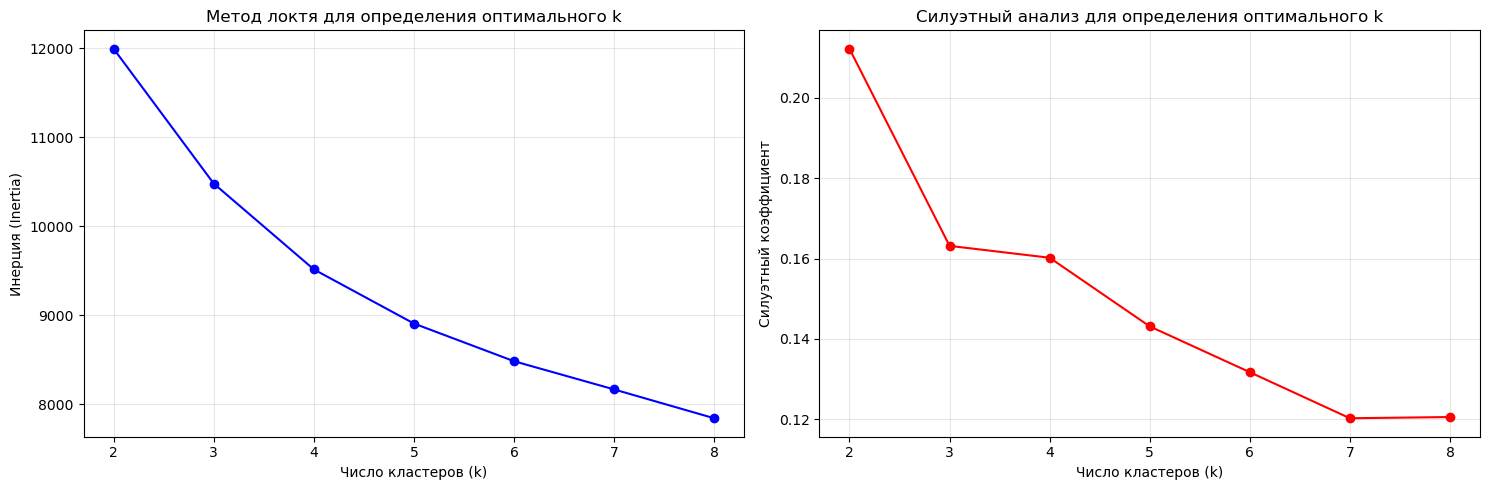

Оптимальное k по методу локтя: 4
Оптимальное k по силуэтному коэффициенту: 2
Выбрано оптимальное число кластеров: 3

Применение KMeans с 3 кластерами...

Оценка качества кластеризации:
Инерция (Inertia): 10480.68
Число итераций: 14
Силуэтный коэффициент: 0.163
Индекс Дэвиса-Болдина: 2.044
Слабое разделение кластеров

Анализ центров кластеров:

Центры кластеров (оригинальные масштабы):
             Age  Weight (kg)  Height (m)    BMI  Fat_Percentage  \
Кластер 0  38.12        73.73        1.73  24.84           14.94   
Кластер 1  37.73        84.22        1.73  27.97           26.53   
Кластер 2  39.63        66.23        1.71  22.68           28.20   

           Calories_Burned  Session_Duration (hours)  Calories_per_hour  \
Кластер 0          1264.19                      1.75             722.25   
Кластер 1           853.66                      1.15             740.05   
Кластер 2           787.24                      1.12             705.09   

           Workout_Frequency (days/wee

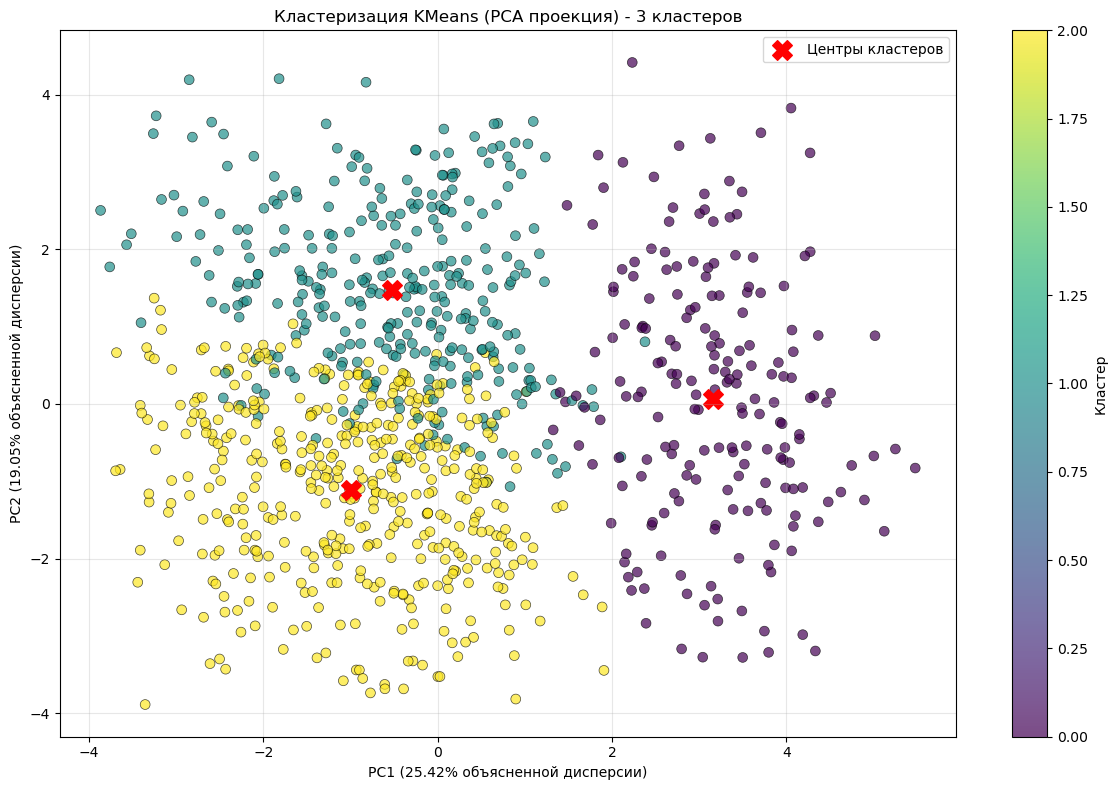


2. Парные графики для анализа кластеров...


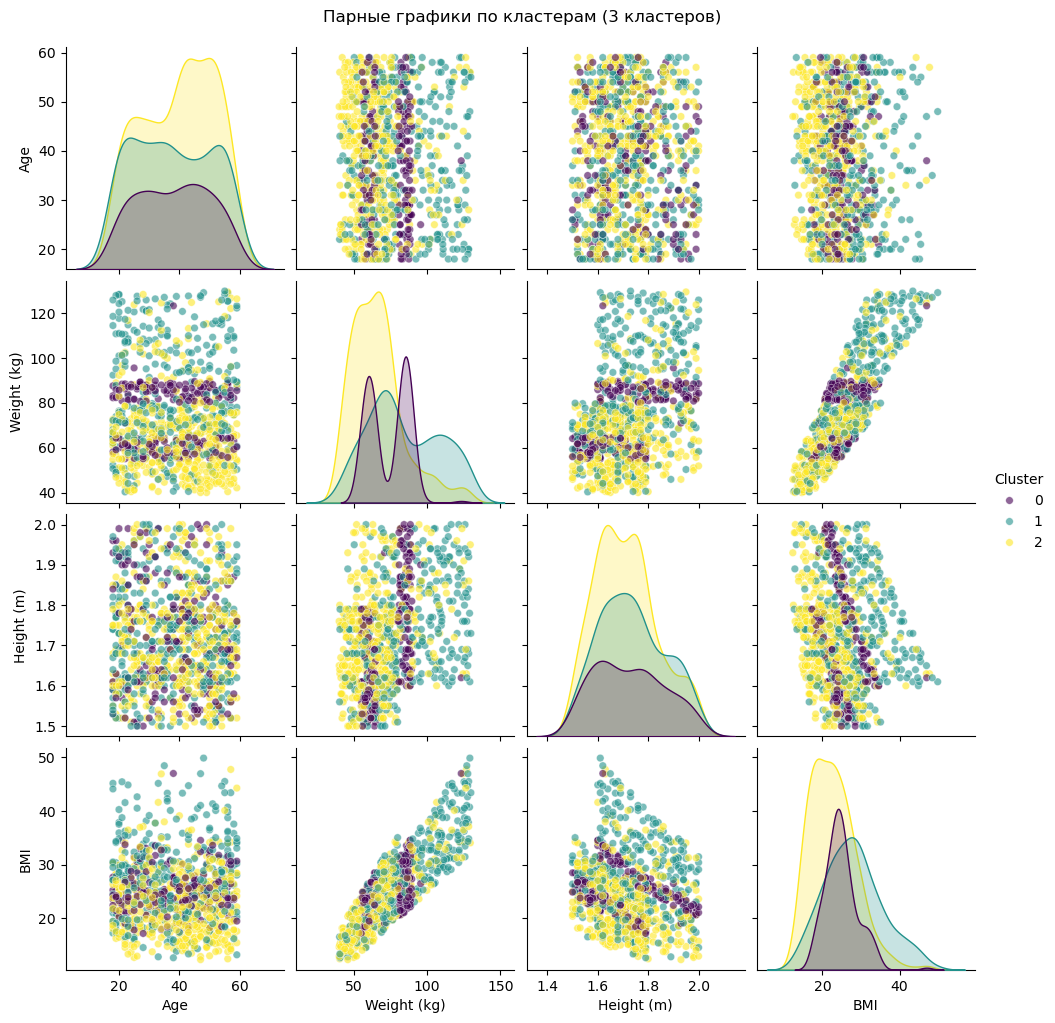


3. Boxplot анализ признаков по кластерам...


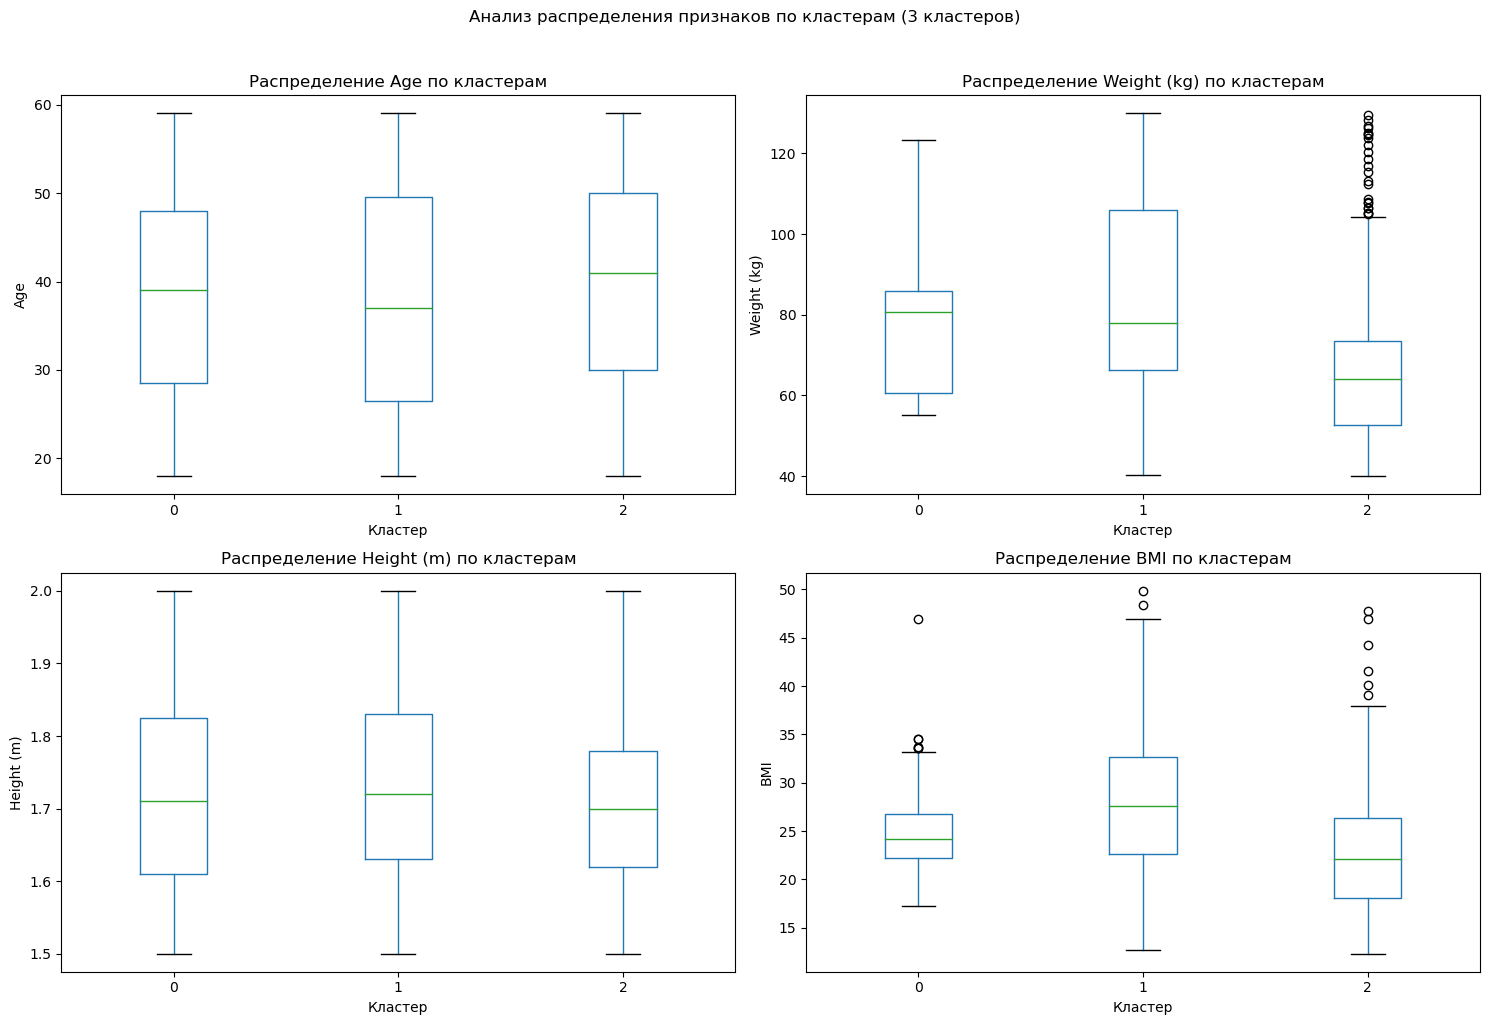


4. Heatmap средних значений признаков по кластерам...


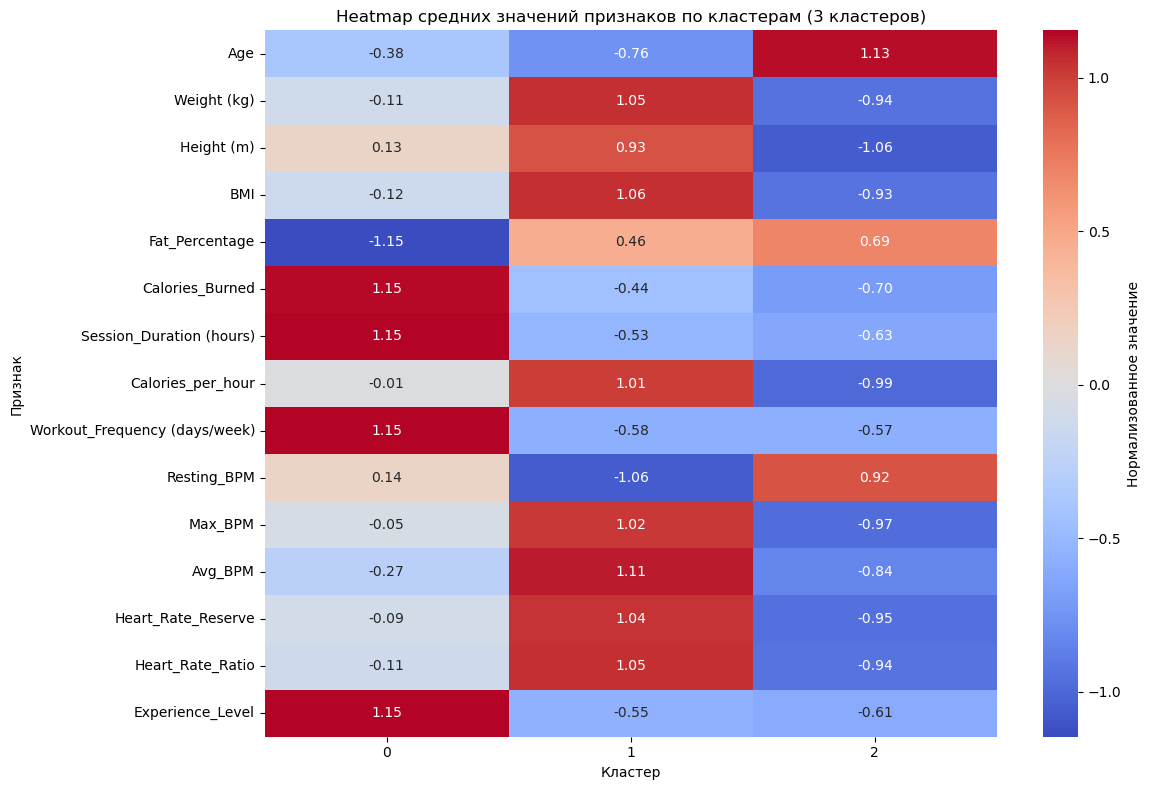


ПРОФИЛИРОВАНИЕ КЛАСТЕРОВ

Статистики по кластерам:

КЛАСТЕР 0
Размер кластера: 195 записей (20.0%)

Ключевые характеристики:
  Средний возраст: 38.1 лет
  Средний ИМТ: 24.8 (нормальный)
  Средний процент жира: 14.9% (низкий)
  Средняя частота тренировок: 4.5 дней/неделю (высокая)
  Средние сожженные калории: 1264 ккал
  Средний уровень опыта: 3.0 (опытный)

Интерпретация кластера 0:
  Это среднего возраста, среднего телосложения, часто тренирующиеся, опытные посетители.

Рекомендации для кластера 0:

КЛАСТЕР 1
Размер кластера: 331 записей (34.0%)

Ключевые характеристики:
  Средний возраст: 37.7 лет
  Средний ИМТ: 28.0 (избыточный)
  Средний процент жира: 26.5% (высокий)
  Средняя частота тренировок: 3.0 дней/неделю (средняя)
  Средние сожженные калории: 854 ккал
  Средний уровень опыта: 1.5 (средний)

Интерпретация кластера 1:
  Это среднего возраста, среднего телосложения, умеренно тренирующиеся, среднего уровня посетители.

Рекомендации для кластера 1:
  - Рекомендуется снизить вес

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

# Функция для безопасной загрузки данных
def load_data_safely(filename):
    """Безопасная загрузка данных"""
    print("Загрузка данных...")
    
    try:
        df = pd.read_csv(filename, encoding='utf-8')
        print(f"Данные загружены успешно!")
        print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
        
        return df
    except Exception as e:
        print(f"Ошибка при загрузке: {e}")
        return None

# Функция для очистки и подготовки данных
def preprocess_data(df):
    """Очистка и подготовка данных"""
    print("\n" + "="*80)
    print("ПОДГОТОВКА ДАННЫХ ДЛЯ КЛАСТЕРИЗАЦИИ")
    print("="*80)
    
    original_shape = df.shape
    print(f"Исходный размер: {original_shape}")
    
    # 1. Удаление дубликатов
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        print(f"Удалено дубликатов: {duplicates}")
        df = df.drop_duplicates()
    
    # 2. Обработка пропущенных значений
    missing = df.isnull().sum()
    if missing.sum() > 0:
        for col in missing[missing > 0].index:
            if df[col].dtype in ['int64', 'float64']:
                median_val = df[col].median()
                df[col] = df[col].fillna(median_val)
    
    # 3. Добавление новых признаков (фич)
    print("\nДобавление новых признаков для кластеризации...")
    
    # Основные физические показатели
    if 'Weight (kg)' in df.columns and 'Height (m)' in df.columns:
        df['BMI'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)
    
    # Тренировочные показатели
    if 'Calories_Burned' in df.columns and 'Session_Duration (hours)' in df.columns:
        df['Calories_per_hour'] = df['Calories_Burned'] / df['Session_Duration (hours)']
    
    # Показатели пульса
    if 'Max_BPM' in df.columns and 'Resting_BPM' in df.columns:
        df['Heart_Rate_Reserve'] = df['Max_BPM'] - df['Resting_BPM']
        df['Heart_Rate_Ratio'] = df['Max_BPM'] / df['Resting_BPM']
    
    # Общий показатель физической формы
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    # Создаем составной показатель физической формы
    if all(col in df.columns for col in ['BMI', 'Fat_Percentage', 'Resting_BPM']):
        # Нормализуем признаки
        for col in ['BMI', 'Fat_Percentage', 'Resting_BPM']:
            if col in df.columns:
                df[f'{col}_norm'] = (df[col] - df[col].mean()) / df[col].std()
        
        # Создаем индекс физической формы (чем меньше - тем лучше форма)
        df['Fitness_Index'] = df['BMI_norm'] + df['Fat_Percentage_norm'] + df['Resting_BPM_norm']
    
    print(f"После подготовки: {df.shape[0]} строк, {df.shape[1]} столбцов")
    print(f"\nНовые признаки:")
    new_cols = [col for col in df.columns if col not in numeric_cols or 'norm' in col or '_Index' in col]
    print(new_cols)
    
    return df

# Функция для выбора признаков для кластеризации
def select_features_for_clustering(df):
    """Выбор признаков для кластеризации"""
    print("\n" + "="*80)
    print("ВЫБОР ПРИЗНАКОВ ДЛЯ КЛАСТЕРИЗАЦИИ")
    print("="*80)
    
    # Выбираем только числовые признаки
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    # Удаляем временные и нормализованные столбцы
    features_to_exclude = ['_norm', '_temp', 'Age_Group']
    selected_features = [col for col in numeric_cols 
                        if not any(excl in col for excl in features_to_exclude)]
    
    print(f"Доступно {len(selected_features)} числовых признаков")
    print("Выбранные признаки для кластеризации:")
    print(selected_features)
    
    # Выбираем ключевые признаки для кластеризации
    key_features = []
    
    # Физические характеристики
    physical_features = ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Fat_Percentage']
    key_features.extend([f for f in physical_features if f in selected_features])
    
    # Тренировочные характеристики
    workout_features = ['Calories_Burned', 'Session_Duration (hours)', 
                       'Calories_per_hour', 'Workout_Frequency (days/week)']
    key_features.extend([f for f in workout_features if f in selected_features])
    
    # Физиологические показатели
    physio_features = ['Resting_BPM', 'Max_BPM', 'Avg_BPM', 
                      'Heart_Rate_Reserve', 'Heart_Rate_Ratio']
    key_features.extend([f for f in physio_features if f in selected_features])
    
    # Уровень опыта
    if 'Experience_Level' in selected_features:
        key_features.append('Experience_Level')
    
    # Удаляем дубликаты
    key_features = list(dict.fromkeys(key_features))
    
    print(f"\nОтобрано {len(key_features)} ключевых признаков:")
    print(key_features)
    
    return key_features

# Функция для определения оптимального числа кластеров
def find_optimal_clusters(X, max_clusters=10):
    """Определение оптимального числа кластеров методом локтя"""
    print("\nОпределение оптимального числа кластеров...")
    
    inertia = []
    silhouette_scores = []
    k_range = range(2, max_clusters + 1)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
        
        # Вычисляем силуэтный коэффициент
        if k > 1:
            silhouette_avg = silhouette_score(X, kmeans.labels_)
            silhouette_scores.append(silhouette_avg)
    
    # Построение графиков для определения оптимального k
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # График метода локтя
    axes[0].plot(k_range, inertia, 'bo-')
    axes[0].set_xlabel('Число кластеров (k)')
    axes[0].set_ylabel('Инерция (Inertia)')
    axes[0].set_title('Метод локтя для определения оптимального k')
    axes[0].grid(True, alpha=0.3)
    
    # График силуэтного коэффициента
    axes[1].plot(range(2, max_clusters + 1), silhouette_scores, 'ro-')
    axes[1].set_xlabel('Число кластеров (k)')
    axes[1].set_ylabel('Силуэтный коэффициент')
    axes[1].set_title('Силуэтный анализ для определения оптимального k')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Автоматическое определение оптимального k
    # Находим точку изгиба на графике инерции
    differences = np.diff(inertia)
    differences_ratio = differences[1:] / differences[:-1]
    
    # Ищем значительное изменение
    optimal_k_elbow = np.argmin(differences_ratio) + 3  # +3 потому что начинаем с k=2
    
    # По силуэтному коэффициенту
    optimal_k_silhouette = np.argmax(silhouette_scores) + 2
    
    print(f"Оптимальное k по методу локтя: {optimal_k_elbow}")
    print(f"Оптимальное k по силуэтному коэффициенту: {optimal_k_silhouette}")
    
    # Выбираем среднее значение
    optimal_k = int(np.round((optimal_k_elbow + optimal_k_silhouette) / 2))
    optimal_k = max(3, min(optimal_k, max_clusters))  # Ограничиваем от 3 до max_clusters
    
    print(f"Выбрано оптимальное число кластеров: {optimal_k}")
    
    return optimal_k

# Основная функция кластеризации KMeans
def apply_kmeans_clustering(df, features, n_clusters=None):
    """Применение кластеризации KMeans"""
    print("\n" + "="*80)
    print("КЛАСТЕРИЗАЦИЯ KMEANS")
    print("="*80)
    
    # Подготовка данных
    X = df[features].copy()
    
    # Стандартизация данных
    print("\nСтандартизация данных...")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Определение оптимального числа кластеров
    if n_clusters is None:
        n_clusters = find_optimal_clusters(X_scaled, max_clusters=8)
    
    # Применение KMeans
    print(f"\nПрименение KMeans с {n_clusters} кластерами...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=20, max_iter=300)
    df['Cluster'] = kmeans.fit_predict(X_scaled)
    
    # Оценка качества кластеризации
    print("\nОценка качества кластеризации:")
    print(f"Инерция (Inertia): {kmeans.inertia_:.2f}")
    print(f"Число итераций: {kmeans.n_iter_}")
    
    # Вычисляем метрики
    if n_clusters > 1:
        silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
        davies_bouldin = davies_bouldin_score(X_scaled, df['Cluster'])
        
        print(f"Силуэтный коэффициент: {silhouette_avg:.3f}")
        print(f"Индекс Дэвиса-Болдина: {davies_bouldin:.3f}")
        
        # Интерпретация силуэтного коэффициента
        if silhouette_avg > 0.7:
            print("Отличное разделение кластеров")
        elif silhouette_avg > 0.5:
            print("Хорошее разделение кластеров")
        elif silhouette_avg > 0.25:
            print("Умеренное разделение кластеров")
        else:
            print("Слабое разделение кластеров")
    
    # Анализ центров кластеров
    print("\nАнализ центров кластеров:")
    cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
    centers_df = pd.DataFrame(cluster_centers, columns=features)
    centers_df.index = [f'Кластер {i}' for i in range(n_clusters)]
    
    print("\nЦентры кластеров (оригинальные масштабы):")
    print(centers_df.round(2))
    
    # Распределение по кластерам
    print("\nРаспределение данных по кластерам:")
    cluster_distribution = df['Cluster'].value_counts().sort_index()
    for cluster, count in cluster_distribution.items():
        percentage = 100 * count / len(df)
        print(f"Кластер {cluster}: {count} записей ({percentage:.1f}%)")
    
    return df, kmeans, scaler, X_scaled

# Функция для визуализации кластеров
def visualize_clusters(df, features, X_scaled, kmeans):
    """Визуализация результатов кластеризации"""
    print("\n" + "="*80)
    print("ВИЗУАЛИЗАЦИЯ КЛАСТЕРОВ")
    print("="*80)
    
    n_clusters = len(np.unique(df['Cluster']))
    
    # 1. Применение PCA для уменьшения размерности
    print("\n1. Применение PCA для визуализации в 2D...")
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    df['PCA1'] = X_pca[:, 0]
    df['PCA2'] = X_pca[:, 1]
    
    # Объясненная дисперсия
    explained_variance = pca.explained_variance_ratio_
    print(f"Объясненная дисперсия PCA: {explained_variance[0]:.3f} (PC1), {explained_variance[1]:.3f} (PC2)")
    print(f"Суммарная объясненная дисперсия: {sum(explained_variance):.3f}")
    
    # 2. Визуализация кластеров в 2D (PCA)
    plt.figure(figsize=(12, 8))
    
    # Scatter plot кластеров
    scatter = plt.scatter(df['PCA1'], df['PCA2'], 
                         c=df['Cluster'], cmap='viridis', 
                         alpha=0.7, s=50, edgecolors='k', linewidth=0.5)
    
    # Центры кластеров в PCA пространстве
    pca_centers = pca.transform(kmeans.cluster_centers_)
    plt.scatter(pca_centers[:, 0], pca_centers[:, 1], 
               c='red', marker='X', s=200, label='Центры кластеров')
    
    plt.xlabel(f'PC1 ({explained_variance[0]:.2%} объясненной дисперсии)')
    plt.ylabel(f'PC2 ({explained_variance[1]:.2%} объясненной дисперсии)')
    plt.title(f'Кластеризация KMeans (PCA проекция) - {n_clusters} кластеров')
    plt.colorbar(scatter, label='Кластер')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 3. Парные графики для ключевых признаков
    print("\n2. Парные графики для анализа кластеров...")
    
    # Выбираем 4 наиболее важных признака для визуализации
    if len(features) >= 4:
        important_features = features[:4]
    else:
        important_features = features
        
    # Создаем DataFrame для парных графиков
    plot_df = df[important_features + ['Cluster']].copy()
    
    # Парные графики рассеяния
    g = sns.pairplot(plot_df, hue='Cluster', palette='viridis', 
                     diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30})
    g.fig.suptitle(f'Парные графики по кластерам ({n_clusters} кластеров)', y=1.02)
    plt.show()
    
    # 4. Boxplot для анализа распределения признаков по кластерам
    print("\n3. Boxplot анализ признаков по кластерам...")
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    for idx, feature in enumerate(important_features[:4]):
        if idx < len(axes):
            ax = axes[idx]
            df.boxplot(column=feature, by='Cluster', ax=ax, grid=False)
            ax.set_title(f'Распределение {feature} по кластерам')
            ax.set_xlabel('Кластер')
            ax.set_ylabel(feature)
            
            # Удаляем автоматическое название
            ax.get_figure().suptitle('')
    
    plt.suptitle(f'Анализ распределения признаков по кластерам ({n_clusters} кластеров)', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # 5. Heatmap средних значений по кластерам
    print("\n4. Heatmap средних значений признаков по кластерам...")
    
    # Вычисляем средние значения по кластерам
    cluster_means = df.groupby('Cluster')[features].mean()
    
    # Нормализуем для heatmap
    cluster_means_normalized = (cluster_means - cluster_means.mean()) / cluster_means.std()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(cluster_means_normalized.T, cmap='coolwarm', 
                annot=True, fmt='.2f', center=0,
                cbar_kws={'label': 'Нормализованное значение'})
    plt.title(f'Heatmap средних значений признаков по кластерам ({n_clusters} кластеров)')
    plt.xlabel('Кластер')
    plt.ylabel('Признак')
    plt.tight_layout()
    plt.show()
    
    return df

# Функция для профилирования кластеров
def profile_clusters(df, features):
    """Профилирование кластеров - описание характеристик каждого кластера"""
    print("\n" + "="*80)
    print("ПРОФИЛИРОВАНИЕ КЛАСТЕРОВ")
    print("="*80)
    
    n_clusters = len(df['Cluster'].unique())
    
    # Вычисляем статистики по кластерам
    cluster_stats = df.groupby('Cluster')[features].agg(['mean', 'std', 'count'])
    
    print("\nСтатистики по кластерам:")
    for cluster in range(n_clusters):
        print(f"\n{'='*40}")
        print(f"КЛАСТЕР {cluster}")
        print(f"{'='*40}")
        
        cluster_data = df[df['Cluster'] == cluster]
        cluster_size = len(cluster_data)
        percentage = 100 * cluster_size / len(df)
        
        print(f"Размер кластера: {cluster_size} записей ({percentage:.1f}%)")
        
        # Анализ ключевых характеристик
        print("\nКлючевые характеристики:")
        
        # Возраст
        if 'Age' in features:
            age_mean = cluster_data['Age'].mean()
            print(f"  Средний возраст: {age_mean:.1f} лет")
        
        # ИМТ
        if 'BMI' in df.columns:
            bmi_mean = cluster_data['BMI'].mean()
            bmi_category = "недостаточный" if bmi_mean < 18.5 else \
                          "нормальный" if bmi_mean < 25 else \
                          "избыточный" if bmi_mean < 30 else "ожирение"
            print(f"  Средний ИМТ: {bmi_mean:.1f} ({bmi_category})")
        
        # Процент жира
        if 'Fat_Percentage' in features:
            fat_mean = cluster_data['Fat_Percentage'].mean()
            fat_category = "низкий" if fat_mean < 15 else \
                          "средний" if fat_mean < 25 else "высокий"
            print(f"  Средний процент жира: {fat_mean:.1f}% ({fat_category})")
        
        # Частота тренировок
        if 'Workout_Frequency (days/week)' in features:
            freq_mean = cluster_data['Workout_Frequency (days/week)'].mean()
            freq_category = "низкая" if freq_mean < 2 else \
                           "средняя" if freq_mean < 4 else "высокая"
            print(f"  Средняя частота тренировок: {freq_mean:.1f} дней/неделю ({freq_category})")
        
        # Сожженные калории
        if 'Calories_Burned' in features:
            calories_mean = cluster_data['Calories_Burned'].mean()
            print(f"  Средние сожженные калории: {calories_mean:.0f} ккал")
        
        # Уровень опыта
        if 'Experience_Level' in features:
            exp_mean = cluster_data['Experience_Level'].mean()
            exp_category = "начинающий" if exp_mean < 1.5 else \
                          "средний" if exp_mean < 2.5 else "опытный"
            print(f"  Средний уровень опыта: {exp_mean:.1f} ({exp_category})")
        
        # Даем интерпретацию кластера
        print(f"\nИнтерпретация кластера {cluster}:")
        
        # Определяем тип посетителя на основе характеристик
        characteristics = []
        
        if 'Age' in features:
            age_mean = cluster_data['Age'].mean()
            if age_mean < 25:
                characteristics.append("молодые")
            elif age_mean < 40:
                characteristics.append("среднего возраста")
            else:
                characteristics.append("старшего возраста")
        
        if 'BMI' in df.columns:
            bmi_mean = cluster_data['BMI'].mean()
            if bmi_mean < 22:
                characteristics.append("стройные")
            elif bmi_mean < 28:
                characteristics.append("среднего телосложения")
            else:
                characteristics.append("полные")
        
        if 'Workout_Frequency (days/week)' in features:
            freq_mean = cluster_data['Workout_Frequency (days/week)'].mean()
            if freq_mean < 2:
                characteristics.append("редко тренирующиеся")
            elif freq_mean < 4:
                characteristics.append("умеренно тренирующиеся")
            else:
                characteristics.append("часто тренирующиеся")
        
        if 'Experience_Level' in features:
            exp_mean = cluster_data['Experience_Level'].mean()
            if exp_mean < 1.5:
                characteristics.append("новички")
            elif exp_mean < 2.5:
                characteristics.append("среднего уровня")
            else:
                characteristics.append("опытные")
        
        if characteristics:
            profile_desc = ", ".join(characteristics)
            print(f"  Это {profile_desc} посетители.")
        
        # Рекомендации для кластера
        print(f"\nРекомендации для кластера {cluster}:")
        
        if 'BMI' in df.columns and bmi_mean > 25:
            print("  - Рекомендуется снизить вес и увеличить кардио-нагрузки")
        
        if 'Fat_Percentage' in features and fat_mean > 25:
            print("  - Необходимо снижение процента жира, фокус на диете")
        
        if 'Workout_Frequency (days/week)' in features and freq_mean < 2:
            print("  - Увеличить частоту тренировок до 3-4 раз в неделю")
        
        if 'Experience_Level' in features and exp_mean < 1.5:
            print("  - Рекомендуется работа с тренером для освоения техники")
        
        if 'Calories_per_hour' in df.columns:
            calories_rate = cluster_data['Calories_per_hour'].mean()
            if calories_rate < 300:
                print("  - Увеличить интенсивность тренировок")
    
    # Создаем сводную таблицу для сравнения кластеров
    print(f"\n{'='*80}")
    print("СВОДНАЯ ТАБЛИЦА КЛАСТЕРОВ")
    print(f"{'='*80}")
    
    summary_stats = []
    for feature in ['Age', 'BMI', 'Fat_Percentage', 'Workout_Frequency (days/week)', 
                    'Calories_Burned', 'Experience_Level']:
        if feature in df.columns:
            for cluster in range(n_clusters):
                cluster_data = df[df['Cluster'] == cluster]
                mean_val = cluster_data[feature].mean()
                summary_stats.append({
                    'Кластер': cluster,
                    'Признак': feature,
                    'Среднее значение': mean_val
                })
    
    summary_df = pd.DataFrame(summary_stats)
    if not summary_df.empty:
        pivot_table = summary_df.pivot(index='Признак', columns='Кластер', values='Среднее значение')
        print("\nСравнительная таблица кластеров:")
        print(pivot_table.round(2))
    
    return df

# Основная функция
def main():
    """Основная функция для выполнения кластеризации KMeans"""
    filename = 'gym_members_exercise_tracking.csv'
    
    print("="*80)
    print("КЛАСТЕРИЗАЦИЯ ПОСЕТИТЕЛЕЙ ТРЕНАЖЕРНОГО ЗАЛА МЕТОДОМ KMEANS")
    print("="*80)
    
    # 1. Загрузка данных
    df = load_data_safely(filename)
    if df is None:
        return
    
    # 2. Подготовка данных
    df = preprocess_data(df)
    
    # 3. Выбор признаков для кластеризации
    features = select_features_for_clustering(df)
    
    if len(features) < 2:
        print("Недостаточно признаков для кластеризации!")
        return
    
    # 4. Применение KMeans кластеризации
    df, kmeans, scaler, X_scaled = apply_kmeans_clustering(df, features)
    
    # 5. Визуализация результатов
    df = visualize_clusters(df, features, X_scaled, kmeans)
    
    # 6. Профилирование кластеров
    df = profile_clusters(df, features)
    
    # 7. Сохранение результатов
    print("\n" + "="*80)
    print("СОХРАНЕНИЕ РЕЗУЛЬТАТОВ")
    print("="*80)
    
    # Сохраняем данные с метками кластеров
    output_filename = 'gym_members_with_clusters.csv'
    df.to_csv(output_filename, index=False, encoding='utf-8')
    print(f"Результаты сохранены в файл: {output_filename}")
    
    # Сохраняем статистику по кластерам
    cluster_summary = df.groupby('Cluster').agg({
        'Age': ['mean', 'std', 'count'],
        'BMI': 'mean',
        'Fat_Percentage': 'mean',
        'Workout_Frequency (days/week)': 'mean',
        'Calories_Burned': 'mean',
        'Experience_Level': 'mean'
    }).round(2)
    
    cluster_summary.to_csv('clusters_summary.csv')
    print("Статистика по кластерам сохранена в файл: clusters_summary.csv")
    
    print("\n" + "="*80)
    print("АНАЛИЗ ЗАВЕРШЕН УСПЕШНО!")
    print("="*80)
    print(f"\nИтоги:")
    print(f"- Всего проанализировано: {len(df)} посетителей")
    print(f"- Выявлено {len(df['Cluster'].unique())} кластеров")
    print(f"- Использовано {len(features)} признаков для кластеризации")
    print(f"- Результаты сохранены в CSV файлы для дальнейшего анализа")

# Запуск анализа
if __name__ == "__main__":
    main()